In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder



In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
cont_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_attribute = 'Outcome'

In [ ]:
x = df[cont_columns].to_numpy()
y = df[target_attribute].to_numpy()
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

In [ ]:
scaler = StandardScaler()

def preprocess_data(data, train=False):
  if train:
    scaler.fit(data)
    
  data = scaler.transform(data)
  return data


In [ ]:
train_x = preprocess_data(train_x, train=True)
test_x = preprocess_data(test_x)

In [ ]:
model = tf.keras.Sequential([
    layers.Input(train_x.shape[1]),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
callbacks = [tf.keras.callbacks.ModelCheckpoint('/content/transfer_learning_weights.h5', monitor='val_acc', save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1, mode = 'min'), 
             tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", mode = "min", patience=2)]
    
history = model.fit(train_x, train_y, epochs=500, batch_size=16, verbose=1, validation_split = 0.2, callbacks = callbacks)

Epoch 1/500
27/27 [==============================] - 1s 10ms/step - loss: 0.6290 - accuracy: 0.6434 - val_loss: 0.5386 - val_accuracy: 0.7222 - lr: 0.0010
Epoch 2/500
27/27 [==============================] - 0s 3ms/step - loss: 0.5948 - accuracy: 0.6550 - val_loss: 0.5128 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 3/500
27/27 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.6597 - val_loss: 0.4968 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 4/500
27/27 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.6690 - val_loss: 0.4822 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 5/500
27/27 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.6923 - val_loss: 0.4769 - val_accuracy: 0.7593 - lr: 0.0010
Epoch 6/500
27/27 [==============================] - 0s 3ms/step - loss: 0.5311 - accuracy: 0.7086 - val_loss: 0.4713 - val_accuracy: 0.7593 - lr: 0.0010
Epoch 7/500
27/27 [==============================] - 0s 4ms/step - loss: 0.

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

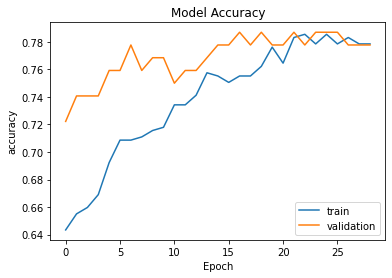

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
model.evaluate(test_x, test_y)  

8/8 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.7965


[0.48785391449928284, 0.7965368032455444]